In [1]:
%matplotlib inline

import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds.drop('Unnamed: 0', axis=1, inplace = True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_index,color_index
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0


In [3]:
# Cut is ordinal, define order for sorting data
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
diamonds.cut = pd.Categorical(diamonds.cut, categories = cut_categories)


In [69]:
# FIGURE PREPARATION
sns.set_theme(style = 'whitegrid', palette = 'rocket')
plt.style.use('./style_sheet.mplstyle')

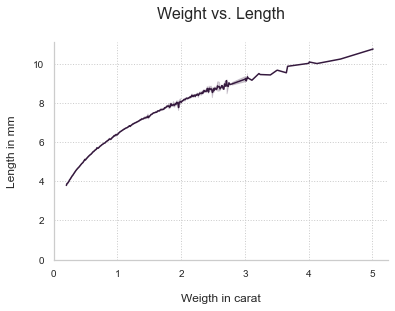

In [66]:
# LINEAR PLOT
sns.lineplot(x = 'carat', y = 'x', data = diamonds)
sns.despine()
plt.xlim(left = 0)
plt.xlabel('\nWeigth in carat')
plt.ylim(bottom = 0)
plt.ylabel('Length in mm\n')
plt.title('Weight vs. Length\n')
plt.show()


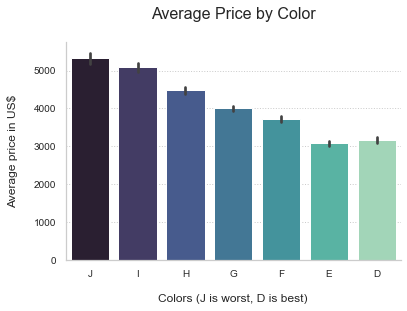

In [67]:
# BAR PLOT
sns.barplot(x = 'color', y = 'price', data = diamonds.sort_values(by='color', ascending=False), palette = 'mako')
sns.despine()
plt.xlabel('\nColors (J is worst, D is best)')
plt.ylabel('Average price in US$\n')
plt.title('Average Price by Color\n')
plt.show()

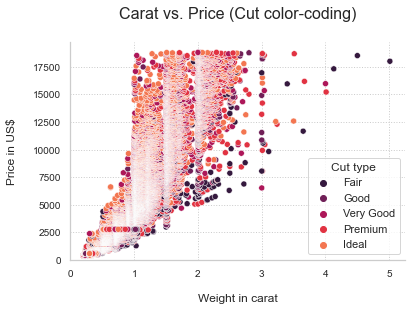

In [7]:
# SCATTER PLOT
sns.scatterplot(x = 'carat', y = 'price', data = diamonds, hue = 'cut')
sns.despine()
plt.xlim(left = 0)
plt.xlabel('\nWeight in carat')
plt.ylabel('Price in US$\n')
plt.ylim(bottom = 0)
plt.title('Carat vs. Price (Cut color-coding)\n')
plt.legend(title = 'Cut type')
plt.show()

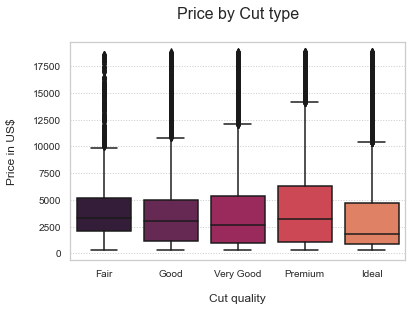

In [8]:
# BOXPLOT
sns.boxplot(x = 'cut', y = 'price', data = diamonds)
plt.xlabel('\nCut quality')
plt.ylabel('Price in US$\n')
plt.title('Price by Cut type\n')
plt.show()

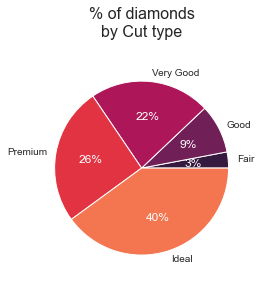

In [59]:
# PIE CHART - DOES NOT EXIST IN SEABORN

diamonds_pie = diamonds.value_counts('cut').reset_index(level=0)
diamonds_pie.cut = pd.Categorical(diamonds_pie.cut, categories = cut_categories)
diamonds_pie.sort_values(by='cut',inplace=True)


_, _, autotexts = plt.pie(diamonds_pie[0], autopct = '%0.0f%%', labels = diamonds_pie.cut)
for autotext in autotexts:
    autotext.set_color('white')
plt.title('% of diamonds\nby Cut type\n')
plt.show()

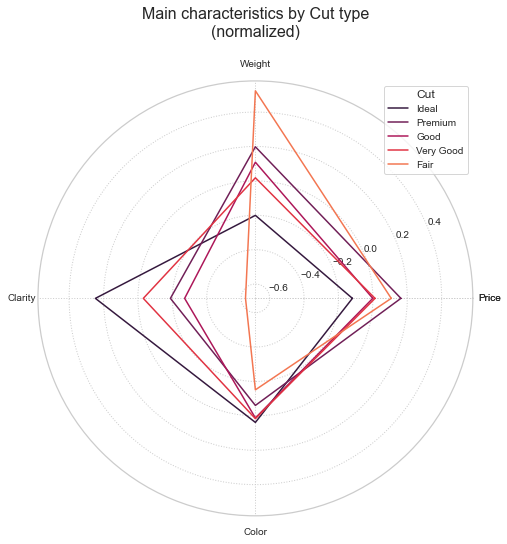

In [70]:
# RADAR - DOES NOT EXIST NATIVELY IN SEABORN

# Normalization of data
normalized_diamonds = pd.DataFrame()
for col in diamonds.columns:
    if is_numeric_dtype(diamonds[col]):
        normalized_diamonds[col]=(diamonds[col]-diamonds[col].mean())/diamonds[col].std()
    else:
        normalized_diamonds[col]=diamonds[col]

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)

categories = ['Price', 'Weight', 'Clarity', 'Color']
categories = [*categories, categories[0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))

d = {}
for cut in diamonds.cut.unique():
    d[cut] = normalized_diamonds.loc[normalized_diamonds.cut == cut, ['price', 'carat', 'clarity_index', 'color_index', 'price']].mean().to_list()
    plt.plot(label_loc, d[cut], label = cut)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.title('Main characteristics by Cut type\n(normalized)\n')
plt.legend(title = 'Cut')
plt.show()

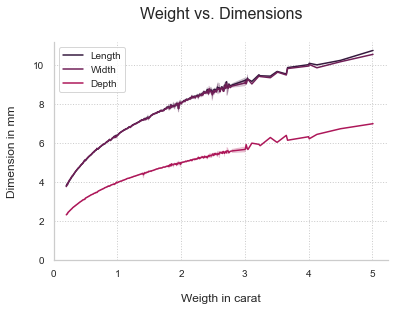

In [71]:
# MULTIPLE SERIES
sns.lineplot(x = 'carat', y = 'x', data = diamonds)
sns.lineplot(x = 'carat', y = 'y', data = diamonds)
sns.lineplot(x = 'carat', y = 'z', data = diamonds)
sns.despine()
plt.xlim(left = 0)
plt.xlabel('\nWeigth in carat')
plt.ylim(bottom = 0)
plt.ylabel('Dimension in mm\n')
plt.title('Weight vs. Dimensions\n')
plt.legend(labels = ['Length', 'Width', 'Depth'])
plt.show()

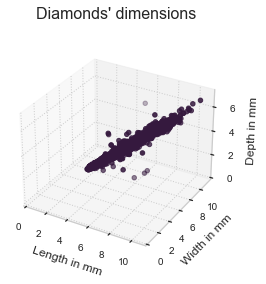

In [14]:
# 3D PROJECTION
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(diamonds.x, diamonds.y, diamonds.z)

plt.title('Diamonds\' dimensions\n')
plt.xlim(left = 0)
plt.xlabel('Length in mm')
plt.ylim(bottom = 0)
plt.ylabel('Width in mm')
ax.set_zlabel('Depth in mm')
ax.set_zlim(bottom = 0)

plt.show()

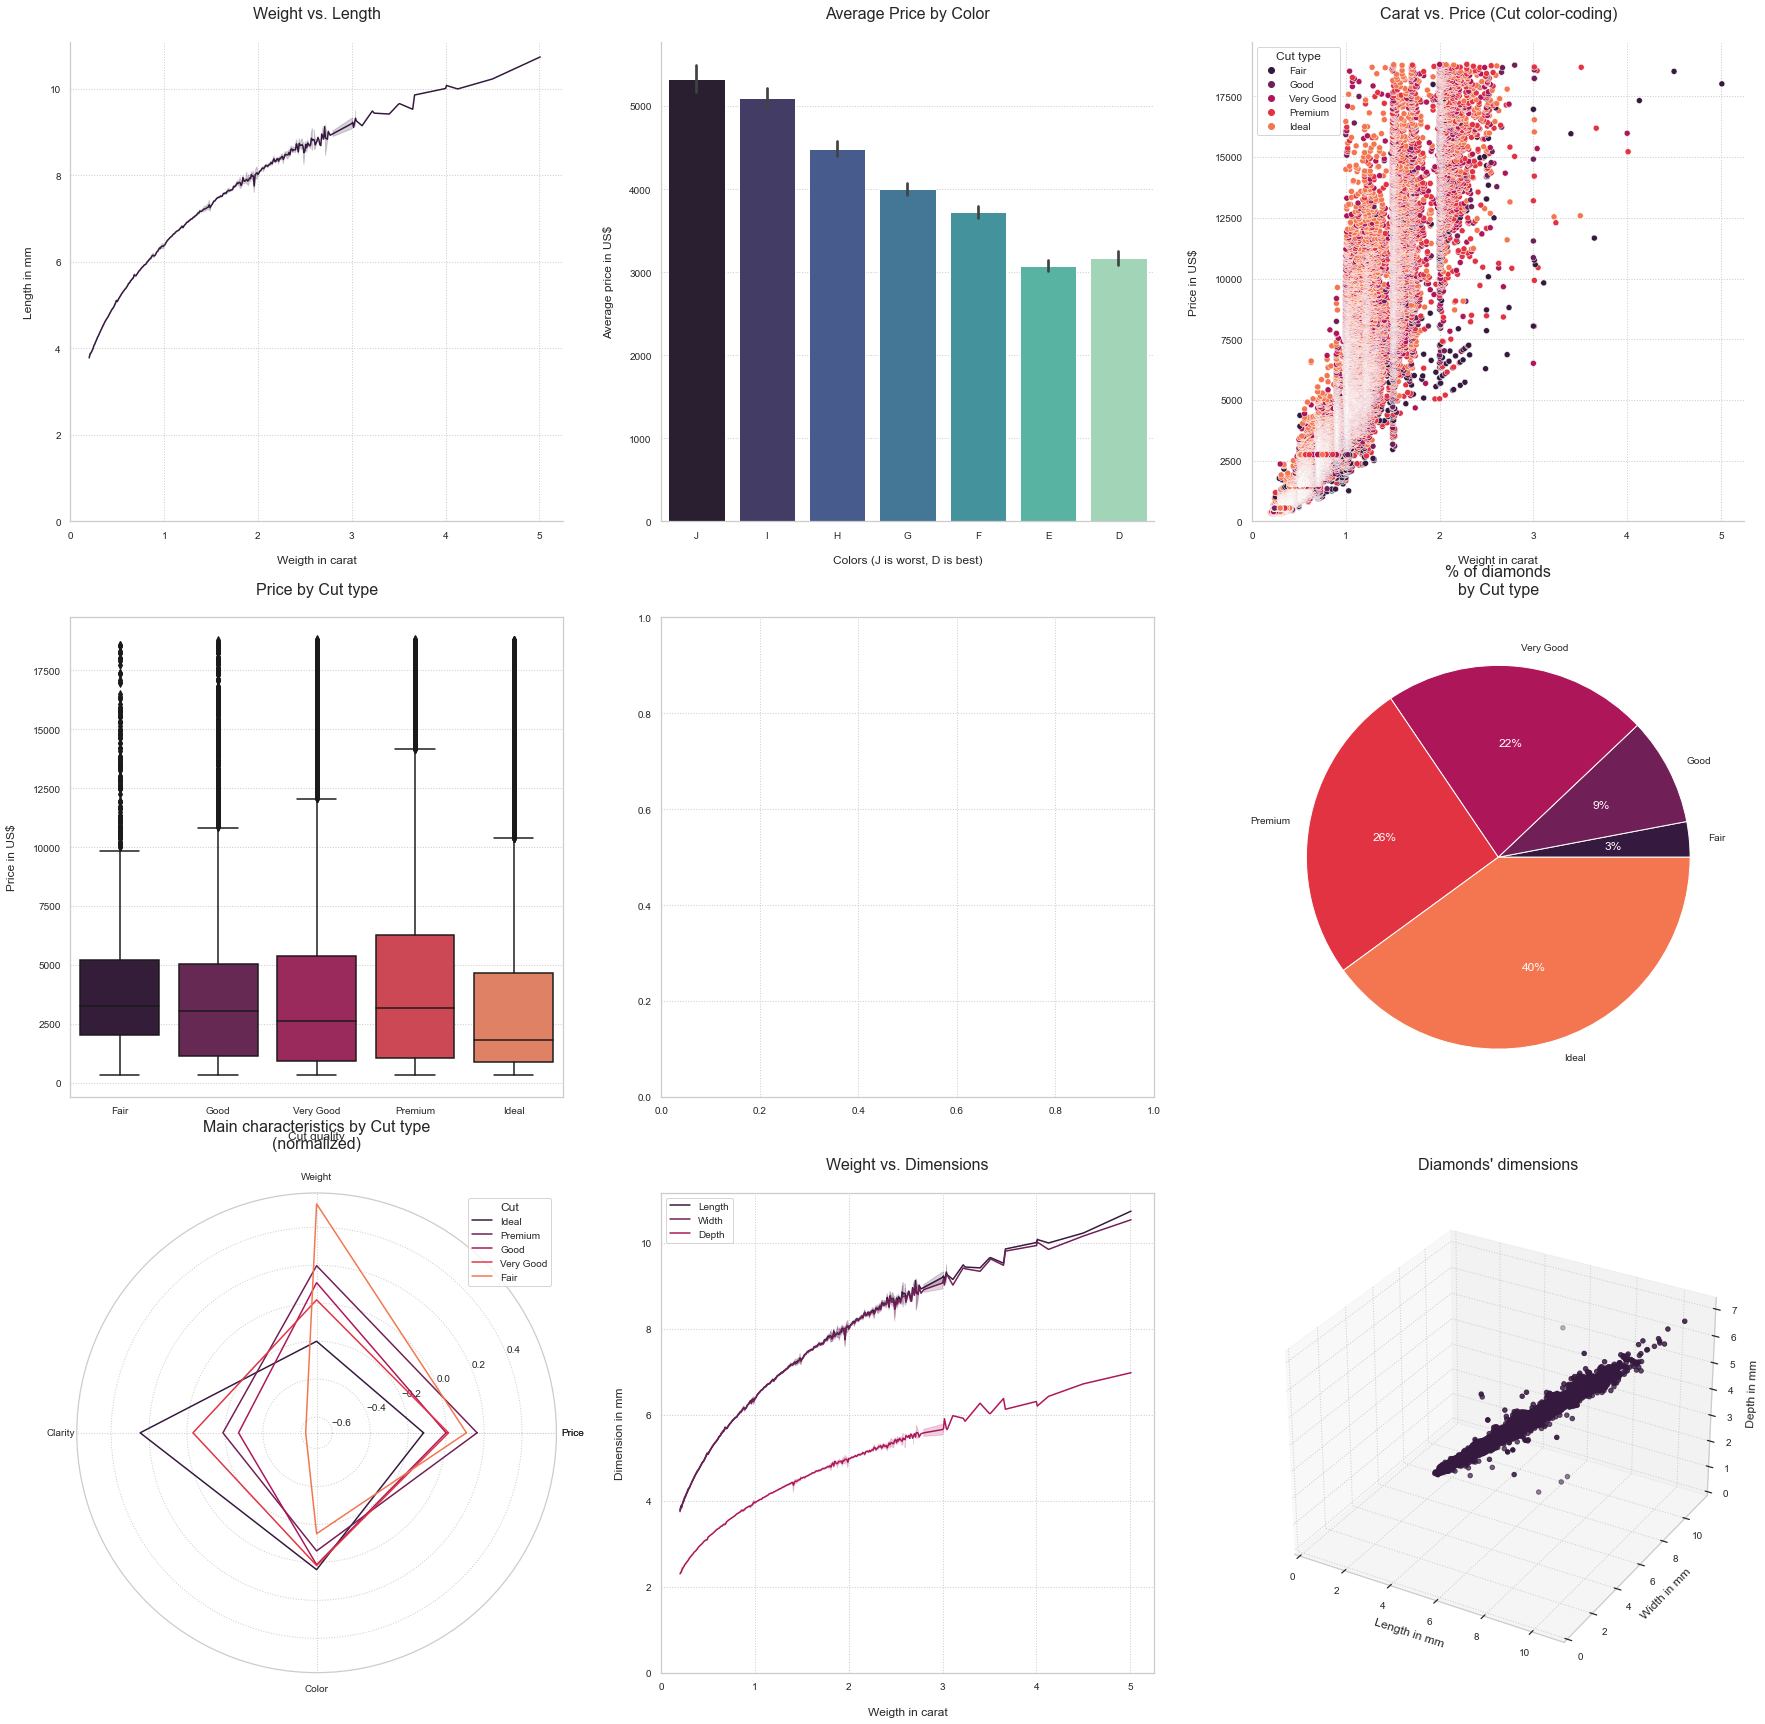

In [90]:
fig = plt.figure(figsize=(30,30))


# LINEAR PLOT
ax1 = fig.add_subplot(331)
sns.lineplot(x = 'carat', y = 'x', data = diamonds, ax = ax1)
sns.despine()
plt.xlim(left = 0)
plt.xlabel('\nWeigth in carat')
plt.ylim(bottom = 0)
plt.ylabel('Length in mm\n')
plt.title('Weight vs. Length\n')

# BAR PLOT
ax2 = fig.add_subplot(332)
sns.barplot(x = 'color', y = 'price', data = diamonds.sort_values(by='color', ascending=False), palette = 'mako', ax = ax2)
sns.despine()
plt.xlabel('\nColors (J is worst, D is best)')
plt.ylabel('Average price in US$\n')
plt.title('Average Price by Color\n')

# SCATTER PLOT
ax3 = fig.add_subplot(333)
sns.scatterplot(x = 'carat', y = 'price', data = diamonds, hue = 'cut', ax = ax3)
sns.despine()
plt.xlim(left = 0)
plt.xlabel('\nWeight in carat')
plt.ylabel('Price in US$\n')
plt.ylim(bottom = 0)
plt.title('Carat vs. Price (Cut color-coding)\n')
plt.legend(title = 'Cut type')

# BOXPLOT
ax4 = fig.add_subplot(334)
sns.boxplot(x = 'cut', y = 'price', data = diamonds, ax = ax4)
plt.xlabel('\nCut quality')
plt.ylabel('Price in US$\n')
plt.title('Price by Cut type\n')

# EMPTY
ax5 = fig.add_subplot(335)


# PIE CHART - DOES NOT EXIST IN SEABORN
ax6 = fig.add_subplot(336)

diamonds_pie = diamonds.value_counts('cut').reset_index(level=0)
diamonds_pie.cut = pd.Categorical(diamonds_pie.cut, categories = cut_categories)
diamonds_pie.sort_values(by='cut',inplace=True)


_, _, autotexts = ax6.pie(diamonds_pie[0], autopct = '%0.0f%%', labels = diamonds_pie.cut)
for autotext in autotexts:
    autotext.set_color('white')
plt.title('% of diamonds\nby Cut type\n')




# RADAR - DOES NOT EXIST NATIVELY IN SEABORN
ax7 = fig.add_subplot(337, polar = True)

# Normalization of data
normalized_diamonds = pd.DataFrame()
for col in diamonds.columns:
    if is_numeric_dtype(diamonds[col]):
        normalized_diamonds[col]=(diamonds[col]-diamonds[col].mean())/diamonds[col].std()
    else:
        normalized_diamonds[col]=diamonds[col]


categories = ['Price', 'Weight', 'Clarity', 'Color']
categories = [*categories, categories[0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))

d = {}
for cut in diamonds.cut.unique():
    d[cut] = normalized_diamonds.loc[normalized_diamonds.cut == cut, ['price', 'carat', 'clarity_index', 'color_index', 'price']].mean().to_list()
    ax7.plot(label_loc, d[cut], label = cut)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.title('Main characteristics by Cut type\n(normalized)\n')
plt.legend(title = 'Cut')

#MULTIPLE SERIES
ax8 = fig.add_subplot(338)
sns.lineplot(x = 'carat', y = 'x', data = diamonds, ax = ax8)
sns.lineplot(x = 'carat', y = 'y', data = diamonds, ax = ax8)
sns.lineplot(x = 'carat', y = 'z', data = diamonds, ax = ax8)
#sns.despine()
plt.xlim(left = 0)
plt.xlabel('\nWeigth in carat')
plt.ylim(bottom = 0)
plt.ylabel('Dimension in mm\n')
plt.title('Weight vs. Dimensions\n')
plt.legend(labels = ['Length', 'Width', 'Depth'])


# 3D PROJECTION
ax9 = fig.add_subplot(339, projection = '3d')
ax9.scatter(diamonds.x, diamonds.y, diamonds.z)

plt.title('Diamonds\' dimensions\n')
plt.xlim(left = 0)
plt.xlabel('Length in mm')
plt.ylim(bottom = 0)
plt.ylabel('Width in mm')
ax9.set_zlabel('Depth in mm')
ax9.set_zlim(bottom = 0)

plt.show()